In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("iphone_purchase_records.csv")

In [3]:
dataset.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [6]:
data = dataset.sample(frac=0.75, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for modelling: '+ str(data.shape))
print('Unseen data for Predictions: '+ str(data_unseen.shape))

Data for modelling: (300, 4)
Unseen data for Predictions: (100, 4)


In [7]:
from pycaret.classification import *

In [8]:
exp_clf101 = setup(data = data, target = 'Purchase Iphone', session_id = 123)

,Description,Value
0,session_id,123
1,Target,Purchase Iphone
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(300, 4)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [9]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.8614,0.9230,0.8482,0.7779,0.8074,0.7001,0.7060,0.0300
nb,Naive Bayes,0.8569,0.9160,0.7643,0.8104,0.7815,0.6757,0.6810,0.0270
ada,Ada Boost Classifier,0.8569,0.8979,0.7500,0.8252,0.7803,0.6748,0.6815,0.0940
rf,Random Forest Classifier,0.8474,0.9200,0.7929,0.7848,0.7828,0.6658,0.6720,0.2320
et,Extra Trees Classifier,0.8426,0.9191,0.7929,0.7767,0.7770,0.6560,0.6646,0.1970
gbc,Gradient Boosting Classifier,0.8231,0.9088,0.7071,0.7879,0.7321,0.6014,0.6152,0.0780
lightgbm,Light Gradient Boosting Machine,0.8186,0.9090,0.7607,0.7410,0.7448,0.6043,0.6109,0.0510
dt,Decision Tree Classifier,0.8181,0.8041,0.7393,0.7624,0.7361,0.5994,0.6139,0.0160
ridge,Ridge Classifier,0.8086,0.0000,0.6393,0.7677,0.6897,0.5550,0.5640,0.0480
lda,Linear Discriminant Analysis,0.8086,0.8854,0.6393,0.7677,0.6897,0.5550,0.5640,0.0200


In [10]:
# random forest model
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7619,0.8673,0.5714,0.6667,0.6154,0.4444,0.4472
1,0.8571,0.9286,0.8571,0.7500,0.8000,0.6897,0.6934
2,0.7143,0.7449,0.7143,0.5556,0.6250,0.4000,0.4082
3,0.8571,0.9796,0.8571,0.7500,0.8000,0.6897,0.6934
4,0.9524,0.9898,0.8571,1.0000,0.9231,0.8889,0.8944
5,0.8095,0.9082,0.7143,0.7143,0.7143,0.5714,0.5714
6,0.9048,0.9327,1.0000,0.8000,0.8889,0.8073,0.8228
7,0.8095,0.9423,0.6250,0.8333,0.7143,0.5758,0.5892
8,0.8571,0.9231,0.8750,0.7778,0.8235,0.7042,0.7077
9,0.9500,0.9835,0.8571,1.0000,0.9231,0.8864,0.8921


In [12]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8571,0.8878,0.8571,0.7500,0.8000,0.6897,0.6934
1,0.8571,0.9082,0.8571,0.7500,0.8000,0.6897,0.6934
2,0.7619,0.8163,0.8571,0.6000,0.7059,0.5161,0.5394
3,0.9524,1.0000,1.0000,0.8750,0.9333,0.8966,0.9014
4,0.9524,1.0000,1.0000,0.8750,0.9333,0.8966,0.9014
5,0.8095,0.8622,0.8571,0.6667,0.7500,0.6000,0.6124
6,0.9048,0.9615,1.0000,0.8000,0.8889,0.8073,0.8228
7,0.8571,0.9038,0.7500,0.8571,0.8000,0.6897,0.6934
8,0.9048,0.9231,1.0000,0.8000,0.8889,0.8073,0.8228
9,0.9000,0.9780,0.8571,0.8571,0.8571,0.7802,0.7802


In [13]:
print(tuned_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


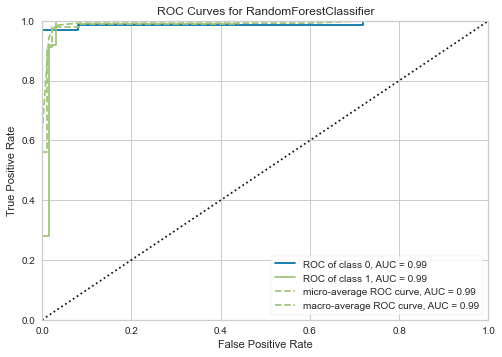

In [14]:
plot_model(tuned_rf, plot='auc')

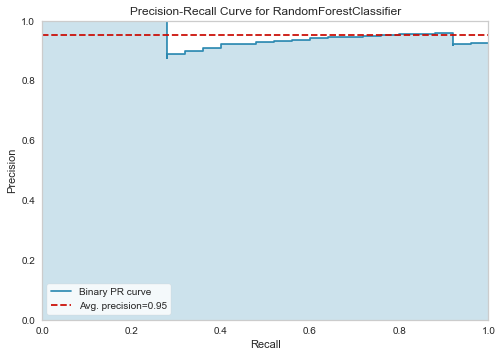

In [15]:
# precison recall curve
plot_model(tuned_rf, plot ='pr')

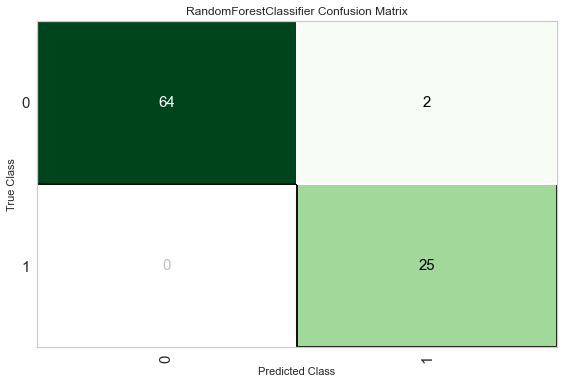

In [16]:
# confusion matrix
plot_model(tuned_rf, plot ='confusion_matrix')

In [17]:
predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9780,0.9879,1.0000,0.9259,0.9615,0.9462,0.9476


In [18]:
# finalize model 
final_rf = finalize_model(tuned_rf)
print(final_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


In [19]:
predict_model(final_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9780,0.9952,1.0000,0.9259,0.9615,0.9462,0.9476


In [20]:
# predict on unseen data
unseen_predictions = predict_model(final_rf,data=data_unseen)
unseen_predictions.head()

,Gender,Age,Salary,Purchase Iphone,Label,Score
0,Female,26,43000,0,0,0.9350
1,Female,27,57000,0,0,0.9385
2,Male,27,58000,0,0,0.9473
3,Female,32,150000,1,1,0.7412
4,Male,32,18000,0,0,0.9221


In [21]:
unseen_predictions

,Gender,Age,Salary,Purchase Iphone,Label,Score
0,Female,26,43000,0,0,0.9350
1,Female,27,57000,0,0,0.9385
2,Male,27,58000,0,0,0.9473
3,Female,32,150000,1,1,0.7412
4,Male,32,18000,0,0,0.9221
...,...,...,...,...,...,...
95,Male,39,71000,0,0,0.7260
96,Male,47,23000,1,1,0.8241
97,Female,46,41000,1,1,0.7124
98,Male,51,23000,1,1,0.8488


In [24]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['Purchase Iphone'], unseen_predictions['Label'], metric = 'Accuracy')

0.93